# Noise Effects on Quantum Sensing

## Introduction

Quantum sensors are highly sensitive to environmental factors, such as noise, which can disrupt the coherence of the quantum system and affect its sensitivity. In this notebook, we will explore how noise influences the performance of a quantum sensor based on spin-1/2 dynamics.

By simulating the sensor's response with different levels of noise, we will observe how it affects the ability to detect weak magnetic field perturbations. This will help us understand the limitations of quantum sensing in noisy environments and how real-world sensors must overcome these challenges.


## Noise in Quantum Systems

In real-world quantum systems, the environment plays a critical role in influencing quantum states. One of the most significant challenges is **noise**, which can arise from thermal fluctuations, electromagnetic fields, or other environmental interactions. 

### What is Noise in Quantum Systems?

Noise introduces random fluctuations in the system, leading to decoherence—the loss of the system's quantum properties such as superposition and entanglement. In a quantum sensor, noise can degrade the sensor's sensitivity, reducing its ability to detect weak external signals like small magnetic field perturbations.

### Types of Noise

Noise in quantum systems can take many forms, including:
1. **Random noise**: Unpredictable, uncorrelated fluctuations that can affect the quantum state's evolution.
2. **1/f noise**: Frequency-dependent noise that becomes stronger at lower frequencies, commonly seen in electronic systems.
3. **Gaussian noise**: A form of noise with a normal distribution, which is commonly used to model many real-world processes.

In this notebook, we will start by simulating **random noise** added to the magnetic field of the quantum sensor. This will allow us to observe how the spin trajectory is affected by environmental noise.

### How Does Noise Affect Quantum Sensors?

Quantum sensors, like the spin-1/2 system we are modeling, are designed to detect tiny external perturbations, such as weak magnetic fields. However, when noise is introduced, the coherence of the quantum states is disrupted, and the sensor's performance degrades.

The ability of the quantum sensor to maintain coherence in the presence of noise is crucial to its sensitivity. By simulating the sensor's response to noise, we can better understand its limitations and how real-world quantum sensors must overcome these challenges.

### Approach

1. **Simulate the base quantum sensor**: Start by simulating the quantum sensor's behavior without noise, where it evolves cleanly under a magnetic field.
2. **Introduce noise**: Add random noise to the magnetic field to simulate environmental interactions. This noise will be generated at each time step and added to the system's Hamiltonian.
3. **Analyze sensor sensitivity**: By varying the noise strength, we will analyze how the quantum sensor's sensitivity to weak magnetic fields is impacted.

Let’s now proceed to simulate the base sensor and study the effects of noise.


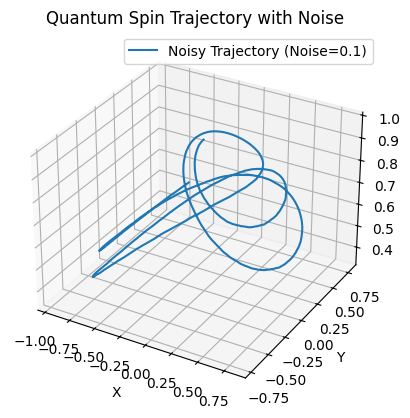

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Constants
gamma = 1.0  # Gyromagnetic ratio
B0 = 1.0     # Base magnetic field along z-axis
B1 = 0.5     # Time-varying magnetic field component along x-axis
omega = 1.0  # Frequency of time-varying field

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Time evolution parameters
time_steps = 1000
t_max = 10.0
dt = t_max / time_steps
times = np.linspace(0, t_max, time_steps)

# Initial state (spin-up along z-axis)
initial_state = np.array([1, 0], dtype=complex)

# Base magnetic field without perturbation
def base_magnetic_field(t):
    return B0 * sigma_z + B1 * np.cos(omega * t) * sigma_x

# Adding random noise to the magnetic field
def noisy_magnetic_field(t, noise_strength=0.1):
    noise = noise_strength * (np.random.random(3) - 0.5)
    H_noise = noise[0] * sigma_x + noise[1] * sigma_y + noise[2] * sigma_z
    return base_magnetic_field(t) + H_noise

# Evolve state with noisy magnetic field
def evolve_state_with_noise(state, times, noise_strength=0.1):
    evolved_states = []
    for t in times:
        H_t = noisy_magnetic_field(t, noise_strength)
        U_t = expm(-1j * H_t * dt)
        state = U_t @ state
        evolved_states.append(state)
    return np.array(evolved_states)

# Simulate with noise
noise_strength = 0.1  # Adjust this value to study different noise levels
evolved_states_noisy = evolve_state_with_noise(initial_state, times, noise_strength)

# Function to compute expectation values
def expectation_values(states):
    x_vals = [np.real(np.conj(state) @ (sigma_x @ state)) for state in states]
    y_vals = [np.real(np.conj(state) @ (sigma_y @ state)) for state in states]
    z_vals = [np.real(np.conj(state) @ (sigma_z @ state)) for state in states]
    return np.array(x_vals), np.array(y_vals), np.array(z_vals)

# Compute expectation values for noisy evolution
x_vals_noisy, y_vals_noisy, z_vals_noisy = expectation_values(evolved_states_noisy)

# Plot the noisy trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals_noisy, y_vals_noisy, z_vals_noisy, label=f'Noisy Trajectory (Noise={noise_strength})')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quantum Spin Trajectory with Noise')
plt.legend()
plt.show()


## Sensitivity to Noise

In this section, we will analyze the quantum sensor's sensitivity to different levels of noise. By increasing the noise strength, we will observe how the sensor's ability to detect weak magnetic field perturbations deteriorates.

We will simulate different noise levels and compare the spin trajectories to study how the noise strength affects the coherence of the quantum sensor.


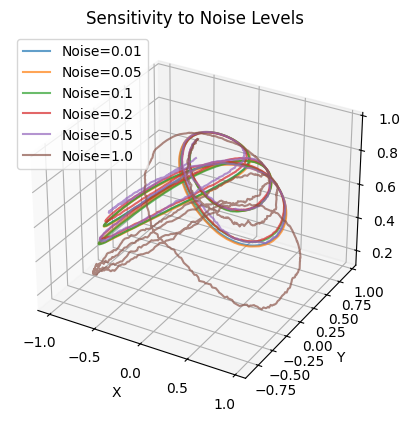

In [3]:
# Function to analyze sensor sensitivity with varying noise levels
def sensitivity_to_noise(noise_strengths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for strength in noise_strengths:
        evolved_states = evolve_state_with_noise(initial_state, times, strength)
        x_vals, y_vals, z_vals = expectation_values(evolved_states)
        ax.plot(x_vals, y_vals, z_vals, label=f'Noise={strength}', alpha=0.7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Sensitivity to Noise Levels')
    plt.legend()
    plt.show()

# Analyze sensitivity to different noise levels
noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
sensitivity_to_noise(noise_levels)


## Conclusion

In this notebook, we explored the effects of noise on a quantum sensor based on spin-1/2 dynamics. By introducing random noise into the magnetic field, we observed how the sensor's ability to detect weak perturbations is affected.

We also performed a sensitivity analysis by varying the noise strength and studying how it impacts the quantum state's coherence. These simulations demonstrate the challenges quantum sensors face in noisy environments and set the stage for exploring error mitigation techniques in the next notebook.
